In [1]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
#DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9736842105263158

In [4]:
best= {}
best['score'] = 0
mds = [3,4,5]
msls = range(2, 11)
mlns = range(7, 12)
for md in mds:
    for msl in msls:
        for mln in mlns:
            m = DecisionTreeClassifier(criterion='entropy', max_depth=md,
                                       min_samples_leaf=msl, max_leaf_nodes=mln)
            m.fit(X_train, y_train)
            score = m.score(X_test, y_test)
            print(f"current score is {score} at md={md}, msl={msl}, mln={mln}")
            if score > best['score']:
                print(f"current best score is {score} at md={md}, msl={msl}, mln={mln}")
                best['score'], best['md'], best['msl'], best['mln'], best['model'] = score, md, msl, mln, m
print(best)

current score is 0.9736842105263158 at md=3, msl=2, mln=7
current best score is 0.9736842105263158 at md=3, msl=2, mln=7
current score is 0.9736842105263158 at md=3, msl=2, mln=8
current score is 0.9736842105263158 at md=3, msl=2, mln=9
current score is 0.9736842105263158 at md=3, msl=2, mln=10
current score is 0.9736842105263158 at md=3, msl=2, mln=11
current score is 0.9736842105263158 at md=3, msl=3, mln=7
current score is 0.9736842105263158 at md=3, msl=3, mln=8
current score is 0.9736842105263158 at md=3, msl=3, mln=9
current score is 0.9736842105263158 at md=3, msl=3, mln=10
current score is 0.9736842105263158 at md=3, msl=3, mln=11
current score is 0.9736842105263158 at md=3, msl=4, mln=7
current score is 0.9736842105263158 at md=3, msl=4, mln=8
current score is 0.9736842105263158 at md=3, msl=4, mln=9
current score is 0.9736842105263158 at md=3, msl=4, mln=10
current score is 0.9736842105263158 at md=3, msl=4, mln=11
current score is 0.9736842105263158 at md=3, msl=5, mln=7
cur

In [5]:
best

{'score': 1.0,
 'md': 4,
 'msl': 2,
 'mln': 7,
 'model': DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=7,
                        min_samples_leaf=2)}

In [6]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
np.unique(data.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [11]:
np.hstack((data.target.reshape(-1,1), data.target_names[data.target].reshape(-1,1)))

array([['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'setosa'],
       ['0', 'se

In [12]:
iris.columns = ['sl', 'sw', 'pl', 'pw']
iris['Species'] = data.target_names[data.target]
iris.head()

,sl,sw,pl,pw,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
iris.isna().sum()

sl         0
sw         0
pl         0
pw         0
Species    0
dtype: int64

In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sl       150 non-null    float64
 1   sw       150 non-null    float64
 2   pl       150 non-null    float64
 3   pw       150 non-null    float64
 4   Species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
iris.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
edaForCategory = {}
for col in np.where(iris.dtypes == object)[0]:
    edaForCategory[iris.columns[col]] = iris.iloc[:, col].value_counts()
    print(edaForCategory[iris.columns[col]])

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64


In [17]:
iris.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [18]:
iris.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [19]:
iris.groupby('Species').agg(['mean', 'std', 'median', 'min', 'max'])

sl                                sw                        \
             mean       std median  min  max   mean       std median  min   
Species                                                                     
setosa      5.006  0.352490    5.0  4.3  5.8  3.428  0.379064    3.4  2.3   
versicolor  5.936  0.516171    5.9  4.9  7.0  2.770  0.313798    2.8  2.0   
virginica   6.588  0.635880    6.5  4.9  7.9  2.974  0.322497    3.0  2.2   

                    pl                                pw                   \
            max   mean       std median  min  max   mean       std median   
Species                                                                     
setosa      4.4  1.462  0.173664   1.50  1.0  1.9  0.246  0.105386    0.2   
versicolor  3.4  4.260  0.469911   4.35  3.0  5.1  1.326  0.197753    1.3   
virginica   3.8  5.552  0.551895   5.55  4.5  6.9  2.026  0.274650    2.0   

                      
            min  max  
Species               
setosa      0.1  0.6  
versicolor  1.0  1.8  
virginica   1.4  2.5

In [20]:
iris.head()

,sl,sw,pl,pw,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


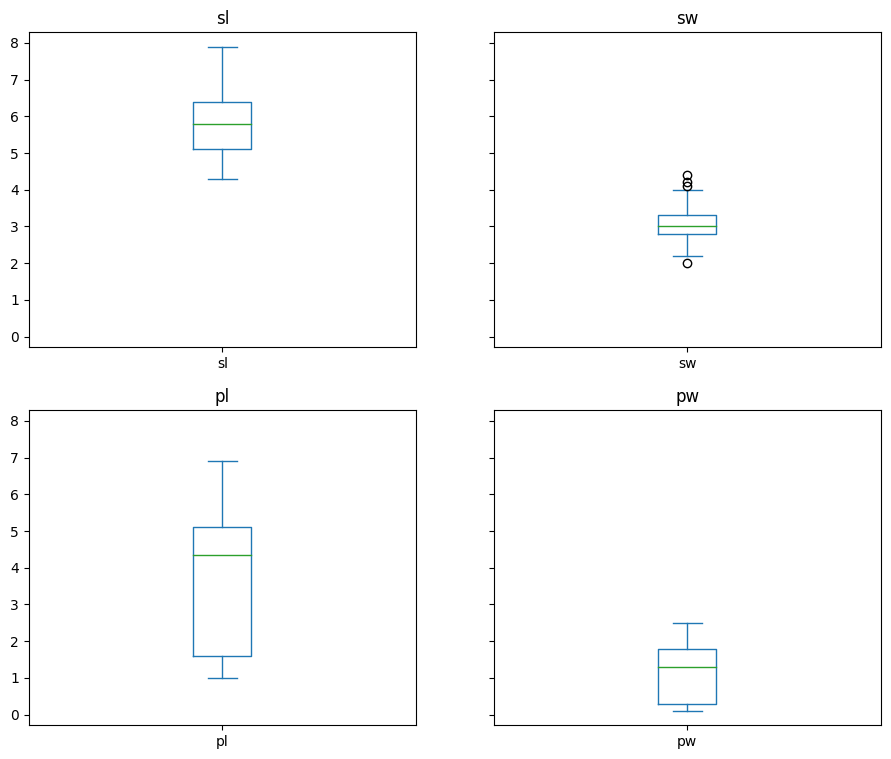

In [21]:
fig, axes = plt.subplots(2,2, figsize=(11, 9), sharey=True)
axes = axes.ravel()
for i, ax in enumerate(axes):
    iris.iloc[:, i].plot(kind='box', ax=ax)
    ax.set_title(iris.columns[i])
plt.show()

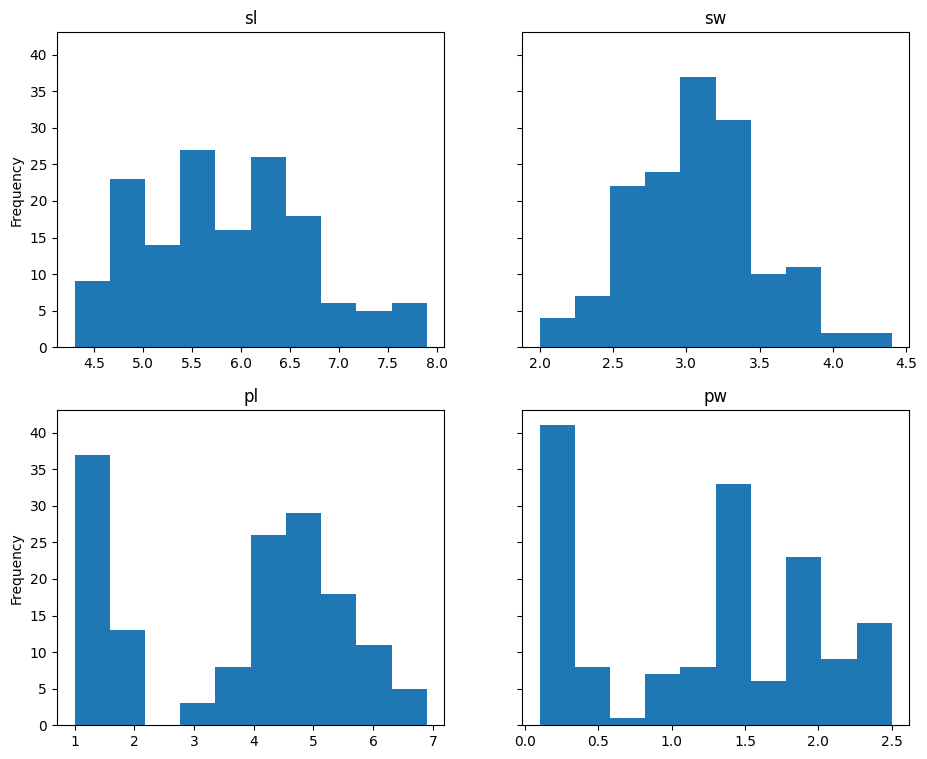

In [23]:
fig, axes = plt.subplots(2,2, figsize=(11, 9), sharey=True)
axes = axes.ravel()
for i, ax in enumerate(axes):
    iris.iloc[:, i].plot(kind='hist', ax=ax)
    ax.set_title(iris.columns[i])
plt.show()

<ipython-input-24-4669051da8cc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris.corr()


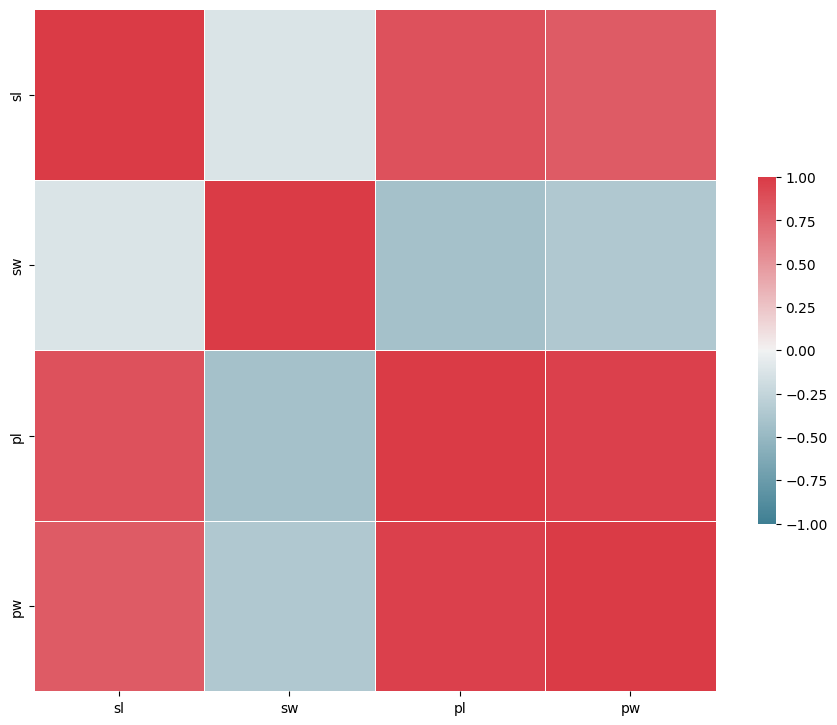

In [24]:
corr = iris.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(11,9))
sns.heatmap(corr, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink':.5})
plt.show()

In [25]:
corr

,sl,sw,pl,pw
sl,1.000000,-0.117570,0.871754,0.817941
sw,-0.117570,1.000000,-0.428440,-0.366126
pl,0.871754,-0.428440,1.000000,0.962865
pw,0.817941,-0.366126,0.962865,1.000000


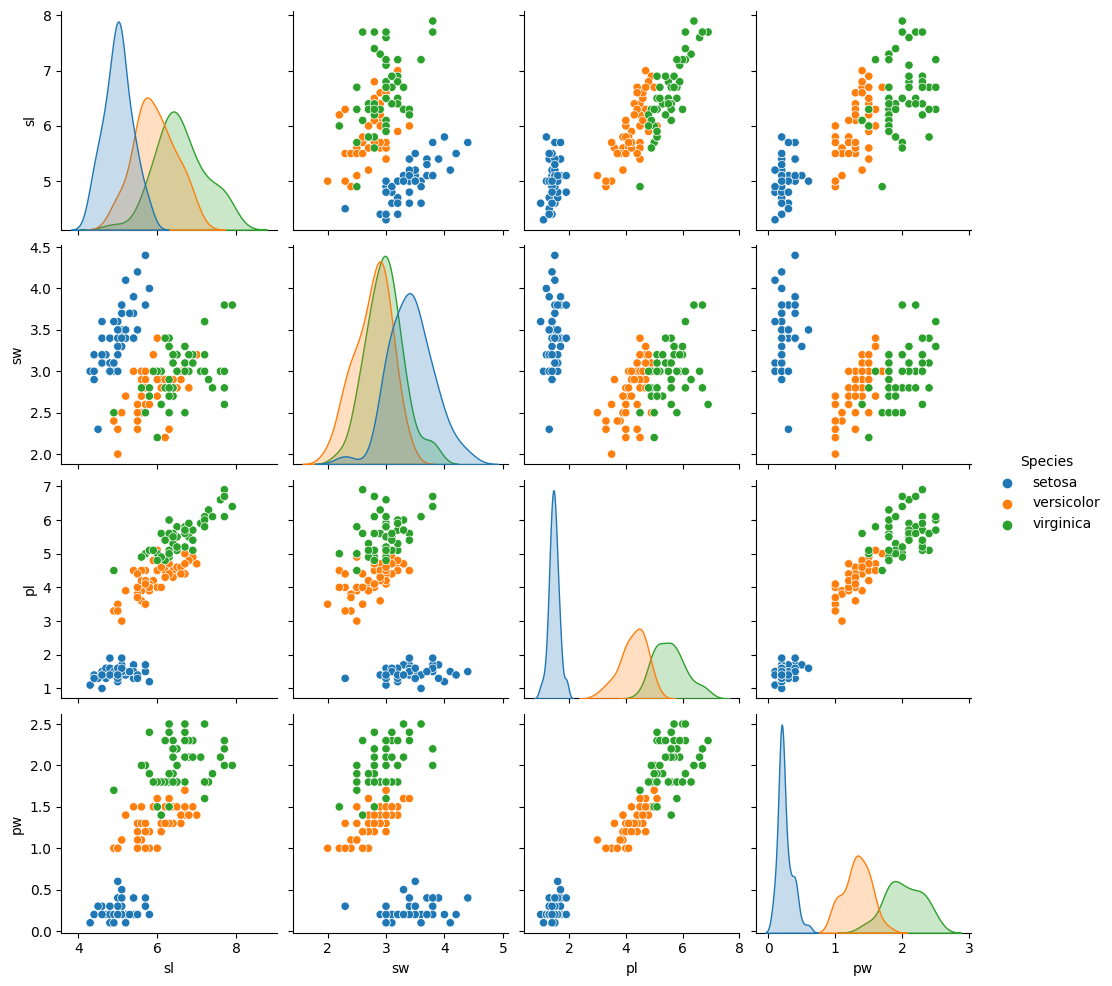

In [26]:
sns.pairplot(iris, hue='Species')
plt.show()

In [28]:
iris.groupby('Species').size().keys()

Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='Species')

In [29]:
iris.groupby('Species').size()['setosa']

50

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1], iris.iloc[:, -1], test_size=0.2, random_state=1
)

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

In [32]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

In [33]:
#KFold
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
results =cross_val_score(model, X_train, y_train, cv=cv)
fin_result = results.mean()

for i, r in enumerate(results):
    print(f"{i}번째 교차검증 정확도: {r}")

print(f"\n교차검증 최종 정확도: {fin_result}")

0번째 교차검증 정확도: 0.9166666666666666
1번째 교차검증 정확도: 0.9166666666666666
2번째 교차검증 정확도: 0.9166666666666666
3번째 교차검증 정확도: 1.0
4번째 교차검증 정확도: 0.9166666666666666
5번째 교차검증 정확도: 0.9166666666666666
6번째 교차검증 정확도: 0.9166666666666666
7번째 교차검증 정확도: 1.0
8번째 교차검증 정확도: 1.0
9번째 교차검증 정확도: 1.0

교차검증 최종 정확도: 0.95


In [34]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results =cross_val_score(model, X_train, y_train, cv=cv)
fin_result = results.mean()

for i, r in enumerate(results):
    print(f"{i}번째 교차검증 정확도: {r}")

print(f"\n교차검증 최종 정확도: {fin_result}")

0번째 교차검증 정확도: 0.9166666666666666
1번째 교차검증 정확도: 1.0
2번째 교차검증 정확도: 0.9166666666666666
3번째 교차검증 정확도: 0.9166666666666666
4번째 교차검증 정확도: 0.9166666666666666
5번째 교차검증 정확도: 1.0
6번째 교차검증 정확도: 1.0
7번째 교차검증 정확도: 0.9166666666666666
8번째 교차검증 정확도: 0.9166666666666666
9번째 교차검증 정확도: 1.0

교차검증 최종 정확도: 0.95


In [35]:
best= {}
best['score'] = 0
mds = [3,4,5]
msls = range(2, 11)
mlns = range(7, 12)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

for md in mds:
    for msl in msls:
        for mln in mlns:
            m = DecisionTreeClassifier(criterion='entropy', max_depth=md,
                                       min_samples_leaf=msl, max_leaf_nodes=mln)
            results = cross_val_score(m, X_train, y_train, cv=cv)
            score = results.mean()
            print(f"current val score is {score} at md={md}, msl={msl}, mln={mln}")
            if score > best['score']:
                print(f"current best val score is {score} at md={md}, msl={msl}, mln={mln}")
                best['score'], best['md'], best['msl'], best['mln'], best['model'] = score, md, msl, mln, m

print(f"\n\n best val score is {best['score']} at md={best['md']}, msl={best['msl']}, mln={best['mln']}")
m = best['model'].fit(X_train, y_train)
testScrore = best['model'].score(X_test, y_test)
print(f"real Test score is {testScrore}")

current val score is 0.9666666666666666 at md=3, msl=2, mln=7
current best val score is 0.9666666666666666 at md=3, msl=2, mln=7
current val score is 0.9666666666666666 at md=3, msl=2, mln=8
current val score is 0.9666666666666666 at md=3, msl=2, mln=9
current val score is 0.9666666666666666 at md=3, msl=2, mln=10
current val score is 0.9666666666666666 at md=3, msl=2, mln=11
current val score is 0.9666666666666666 at md=3, msl=3, mln=7
current val score is 0.9666666666666666 at md=3, msl=3, mln=8
current val score is 0.9666666666666666 at md=3, msl=3, mln=9
current val score is 0.9666666666666666 at md=3, msl=3, mln=10
current val score is 0.9666666666666666 at md=3, msl=3, mln=11
current val score is 0.9666666666666666 at md=3, msl=4, mln=7
current val score is 0.9666666666666666 at md=3, msl=4, mln=8
current val score is 0.9666666666666666 at md=3, msl=4, mln=9
current val score is 0.9666666666666666 at md=3, msl=4, mln=10
current val score is 0.9666666666666666 at md=3, msl=4, mln=

In [38]:
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier()
params= {'max_depth':range(4, 13, 2),
        'criterion':['gini', 'entropy'],
        'splitter':['best', 'random'],
        'random_state':[7, 23, 42, 78, 142],
        'min_impurity_decrease':[0., 0.05, 0.1, 0.2]}
model = GridSearchCV(estimator, params, cv=cv, verbose=1,
                    n_jobs=-1, refit=True)

# refit=True인 경우라면 재학습은 불필요하다.
model.fit(X_train, y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 13, 2),
                         'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2],
                         'random_state': [7, 23, 42, 78, 142],
                         'splitter': ['best', 'random']},
             verbose=1)

In [39]:
print(f"Best Estimator: {model.best_estimator_}\n")
print(f"Best Params: {model.best_params_}\n")
print(f"Best Scorer: {model.best_score_}\n")

Best Estimator: DecisionTreeClassifier(max_depth=4, random_state=7, splitter='random')

Best Params: {'criterion': 'gini', 'max_depth': 4, 'min_impurity_decrease': 0.0, 'random_state': 7, 'splitter': 'random'}

Best Scorer: 0.975



In [40]:
model.score(X_test, y_test)

0.9666666666666667

In [41]:
estimator = DecisionTreeClassifier()
params= {'max_depth':[3, 4, 5, 6],
        'min_samples_split':range(2, 11),
        'max_leaf_nodes':range(7, 12)}
m2 = GridSearchCV(estimator, params, cv=cv, verbose=1,
                    n_jobs=-1, refit=True)

# refit=True인 경우라면 재학습은 불필요하다.
m2.fit(X_train, y_train)

print(f"Best Estimator: {m2.best_estimator_}\n")
print(f"Best Params: {m2.best_params_}\n")
print(f"Best Scorer: {m2.best_score_}\n")

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Best Estimator: DecisionTreeClassifier(max_depth=3, max_leaf_nodes=7)

Best Params: {'max_depth': 3, 'max_leaf_nodes': 7, 'min_samples_split': 2}

Best Scorer: 0.9666666666666666



In [42]:
m2.score(X_test, y_test)

0.9666666666666667

In [43]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f'Accuracy : {acc}')

Accuracy : 0.9666666666666667


In [44]:
model.score(X_test, y_test)

0.9666666666666667

In [45]:
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_test, pred)
print(f"Confusion Matrix : \n{confMatrix}")

Confusion Matrix : 
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [46]:
print(f"Accuracy : \n{confMatrix.trace()/confMatrix.sum()}")

Accuracy : 
0.9666666666666667


In [47]:
print(f'실제 타겟값의 수: {confMatrix.sum(axis=1)}')
print(f'예측 타겟값의 수: {confMatrix.sum(axis=0)}')

실제 타겟값의 수: [11 13  6]
예측 타겟값의 수: [11 12  7]


In [49]:
from sklearn.metrics import precision_score

precisions = precision_score(y_test, pred, average=None)
for target, score in zip(data.target_names, precisions):
    print(f"{target}의 정밀도: {score}")

setosa의 정밀도: 1.0
versicolor의 정밀도: 1.0
virginica의 정밀도: 0.8571428571428571


In [50]:
confMatrix

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [51]:
precs = []
rcls = []
specs = []
for i in range(3):
    TP = confMatrix[i, i]
    FN = confMatrix[i].sum() - TP
    FP = confMatrix[:,i].sum() - TP
    TN = confMatrix.sum() - TP - FN - FP
#     TN = confMatrix.trace() - TP
    precs.append(TP/(TP+FP))
    rcls.append(TP/(TP+FN))
    specs.append(TN/(TN+FP))

precs = np.array(precs)
rcls = np.array(rcls)
specs = np.array(specs)
fall_outs = 1 - specs

print(precs)
print(rcls)
print(specs)
print(fall_outs)

[1.         1.         0.85714286]
[1.         0.92307692 1.        ]
[1.         1.         0.95833333]
[0.         0.         0.04166667]


In [53]:
from sklearn.metrics import recall_score

recalls = recall_score(y_test, pred, average=None)
for target, score in zip(data.target_names, recalls):
    print(f"{target}의 재현율: {score}")

setosa의 재현율: 1.0
versicolor의 재현율: 0.9230769230769231
virginica의 재현율: 1.0


In [54]:
from sklearn.metrics import f1_score

F1scores = f1_score(y_test, pred, average=None)
for target, score in zip(data.target_names, F1scores):
    print(f"{target}의 F1점수: {score}")

setosa의 F1점수: 1.0
versicolor의 F1점수: 0.9600000000000001
virginica의 F1점수: 0.923076923076923


In [55]:
confMatrix

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [56]:
from sklearn.metrics import classification_report

classReport = classification_report(y_test, pred)
print(f"Classification Report : \n{classReport}")

Classification Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [57]:
y_test.value_counts()

versicolor    13
setosa        11
virginica      6
Name: Species, dtype: int64

In [58]:
pred[:10]

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica'],
      dtype=object)

In [59]:
pred_proba = model.predict_proba(X_test)
pred_proba[:10]

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.88235294, 0.11764706],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.88235294, 0.11764706],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ]])

In [60]:
y_test[:10]

14         setosa
98     versicolor
75     versicolor
16         setosa
131     virginica
56     versicolor
141     virginica
44         setosa
29         setosa
120     virginica
Name: Species, dtype: object

In [61]:

viewPoint = np.hstack((pred_proba, y_test.values.reshape(-1, 1)))
viewPoint[:10]

array([[1.0, 0.0, 0.0, 'setosa'],
       [0.0, 1.0, 0.0, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [1.0, 0.0, 0.0, 'setosa'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.0, 1.0, 'virginica'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [0.0, 0.0, 1.0, 'virginica']], dtype=object)

In [62]:
viewPoint[np.argsort(pred_proba[:,0])[::-1]]

array([[1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 1.0, 0.0, 'versicolor'],
       [0.0, 1.0, 0.0, 'versicolor'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 1.0, 0.0, 'versicolor'],
       [0.0, 0.8823529411764706, 0.1176470588235294

In [63]:
viewPoint[np.argsort(pred_proba[:,1])[::-1]]

array([[0.0, 1.0, 0.0, 'versicolor'],
       [0.0, 1.0, 0.0, 'versicolor'],
       [0.0, 1.0, 0.0, 'versicolor'],
       [0.0, 1.0, 0.0, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.0, 1.0, 'virginica'],
       [1.0, 0.0, 0.0, 'setosa'],
       [0.0, 0.0, 1.0, 'virginica'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.0, 1.0, 'virginica'],
       [1.0, 0.0, 0.0, 'setosa'],
       [0.0,

In [64]:
viewPoint[np.argsort(pred_proba[:,2])[::-1]]

array([[0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.0, 1.0, 'versicolor'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.0, 1.0, 'virginica'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 0.8823529411764706, 0.11764705882352941, 'versicolor'],
       [0.0, 1.0, 0.0, 'versicolor'],
       [1.0, 0.0, 0.0, 'setosa'],
       [0.0, 1.0, 0.0, 'versicolor'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.0, 0.0, 0.0, 'setosa'],
       [1.

In [66]:
from sklearn.metrics import roc_auc_score


aucs = roc_auc_score(y_test, pred_proba, multi_class='ovr')
print(f"ROC-AUC score is meaned with : \n{aucs}")

ROC-AUC score is meaned with : 
0.9802350427350427


In [68]:
model.fit(iris.iloc[:,:-1], iris.iloc[:,-1])

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 13, 2),
                         'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2],
                         'random_state': [7, 23, 42, 78, 142],
                         'splitter': ['best', 'random']},
             verbose=1)

In [69]:
import pickle

with open('final_model.pickle', 'wb') as fp:
    pickle.dump(model, fp)

In [70]:
f = open('final_model.pickle', 'rb')
model = pickle.load(f); f.close()

predicts = model.predict(iris.iloc[:, :-1])
iris['preds'] = predicts
iris.to_csv('FinalResult.csv', index=False)

In [71]:
(iris['Species'] == iris['preds']).mean()

0.9866666666666667